In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.drop('Id',axis=1,inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

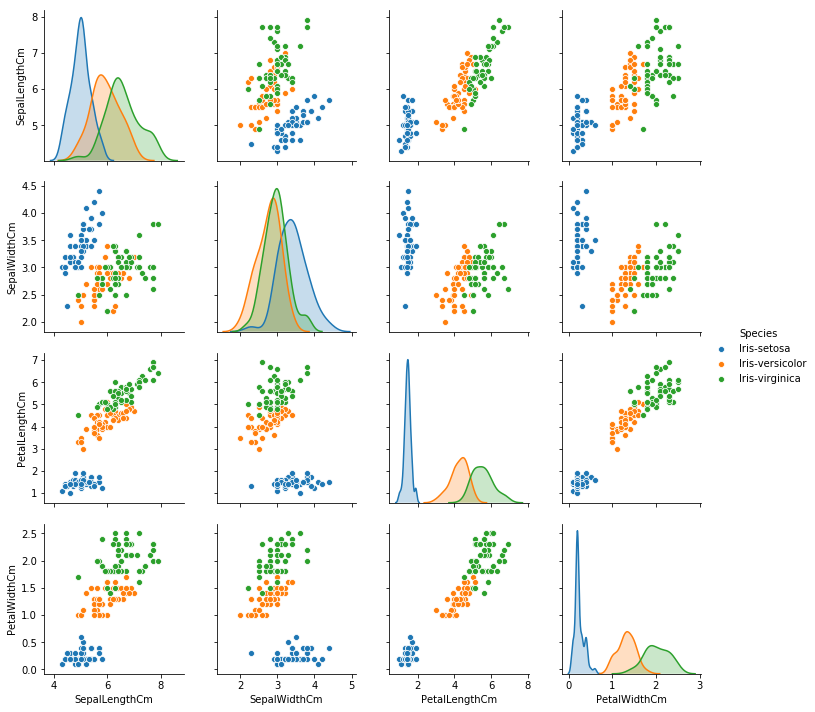

In [6]:
sns.pairplot(dataset,hue='Species')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset.drop('Species',axis=1),dataset['Species'],test_size=0.33,random_state=101)

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

predicts = model.predict(X_test)

In [9]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(dataset.columns[:4])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

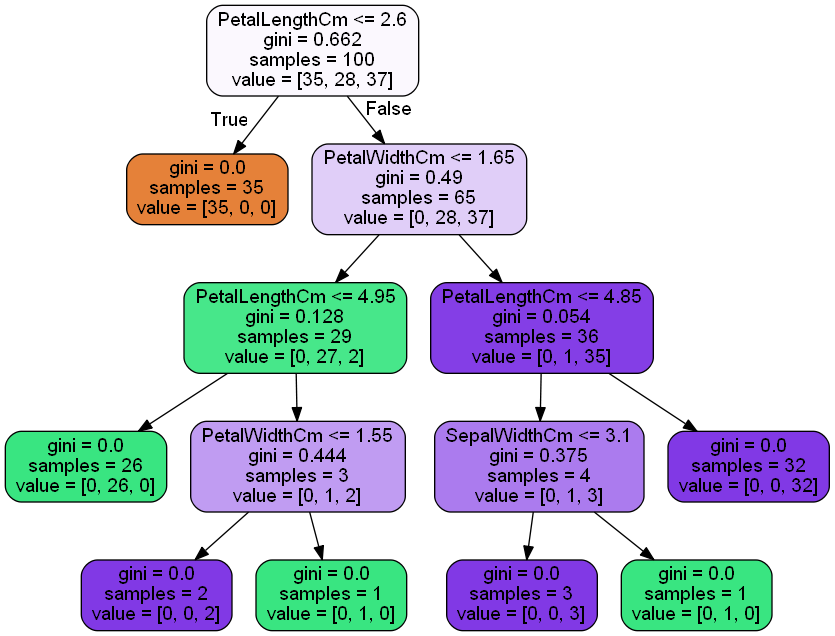

In [10]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predicts))
print(classification_report(y_test,predicts))

[[15  0  0]
 [ 0 21  1]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.95      0.95      0.95        22
 Iris-virginica       0.92      0.92      0.92        13

      micro avg       0.96      0.96      0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [12]:
s_length = float(input("Enter Sepal Length in cm: "))
s_width = float(input("Enter Sepal Width in cm: "))
p_length = float(input("Enter Petal Length in cm: "))
p_width = float(input("Enter Sepal Widt in cm: "))

print(model.predict([[s_length,s_width,p_length,p_width]]))

Enter Sepal Length in cm: 1.3
Enter Sepal Width in cm: 0.3
Enter Petal Length in cm: 1
Enter Sepal Widt in cm: 0.69
['Iris-setosa']
